# Credit Score Classification

### Problem Statement
* You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task
* Given a person’s credit-related information, build a machine learning model that can classify the credit score.

### Table of content
* Packages importing
* Reading Data
* Data Exploration
* Data cleaning
* Data Preprocessing
* Modeling & Evaluation

## Packages Importing

In [1]:
# Packages for EDA 
import matplotlib.pyplot as plt # for visualizing data
import seaborn as sns # more advanced visualizations
import pandas as pd # reading and processing tabular data
import numpy as np # numeric operations

# Data Preprocessing
from sklearn.model_selection import train_test_split #split data into training and tesing sets
from sklearn.preprocessing import PowerTransformer #transform data into a more normal distribution
from datasist.structdata import detect_outliers #detect outliers in the data
from sklearn.metrics import mean_squared_error # to evaluate regression models
from imblearn.over_sampling import SMOTE # to oversample the minority class in imbalanaced datasets  
from sklearn.impute import SimpleImputer # to fill missing values
import category_encoders as ce # for encoding categorical variables
import re #(regular expressions) for text processing

# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting #
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
) # for ensembling learning algorithms
from xgboost import XGBClassifier # for gradient boosting algorithim
from sklearn.metrics import classification_report # to evaluate classification models
import joblib # to save and load trained models

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ; #supress numpy errors

import warnings 
warnings.filterwarnings("ignore") # supress warnings

C:\Users\HP\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Reading the Data

In [2]:
credit_df = pd.read_csv('train.csv', low_memory=False)

In [3]:
credit_df.shape

(100000, 28)

## Data Exploration

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
credit_df.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
82988,130114,37357,5,Andrea Shalal-Esaf,43.0,466761644.0,Doctor,18008.65,1601.720833,3.0,...,Standard,794.29,29.768592,308.0,No,39.193480,56.606590,Low_spent_Large_value_payments,253.350969,Standard
60739,96741,50545,4,Koh Guid,29.0,11730967.0,Developer,79494.40,6501.533333,4.0,...,Standard,2307.13,30.423654,212.0,Yes,268.459402,51.091474,Low_spent_Medium_value_payments,491.510843,Poor
64737,102739,41691,2,Dawsonr,24.0,233227758.0,Engineer,16956.72,1696.060000,5.0,...,Standard,1906.14,25.910313,78.0,Yes,78.225741,29.542936,Low_spent_Large_value_payments,307.106730,Standard
67262,106524,40167,7,Viswanathaf,17.0,874820096.0,Teacher,32377.38,2571.115000,3.0,...,Standard,114.94,36.209201,139.0,Yes,112.174744,60.387624,Low_spent_Large_value_payments,270.797699,Standard
79945,125551,34413,2,David Jonesx,42.0,320209388.0,Manager,144962.44,11940.203333,7.0,...,Standard,1264.61,34.298254,374.0,NM,229.047845,165.617258,Low_spent_Medium_value_payments,128.942519,Standard
93106,145292,34943,3,Spicerx,24.0,414528424.0,Architect,58511.78,5016.981667,2.0,...,Good,404.05,31.500839,321.0,No,0.000000,77.389633,Low_spent_Medium_value_payments,618.193606,Standard
5219,13461,25015,4,Davidc,14.0,319695178.0,Manager,73085.96,5947.496667,10.0,...,Bad,3870.22,21.855402,10.0,Yes,367.055367,103.753251,High_spent_Small_value_payments,265.460527,Poor
95525,148919,48216,6,Sierrai,33.0,115001071.0,Teacher,21205.72,1556.143333,3.0,...,Good,327.83,27.630994,331.0,No,20.007886,59.050012,Low_spent_Small_value_payments,326.556435,Good
93576,145998,45632,1,Bakerz,54.0,855058443.0,Writer,102927.08,8130.152481,7.0,...,Standard,1388.93,39.565527,254.0,NM,111.992460,195.007570,High_spent_Small_value_payments,463.829105,Standard
79436,124786,14102,5,Bartv,55.0,979939286.0,Musician,78937.10,6605.091667,3.0,...,Good,520.56,37.446220,383.0,No,174.416344,72.537736,High_spent_Large_value_payments,566.315707,Standard


In [6]:
credit_df.duplicated().sum()

0

In [7]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


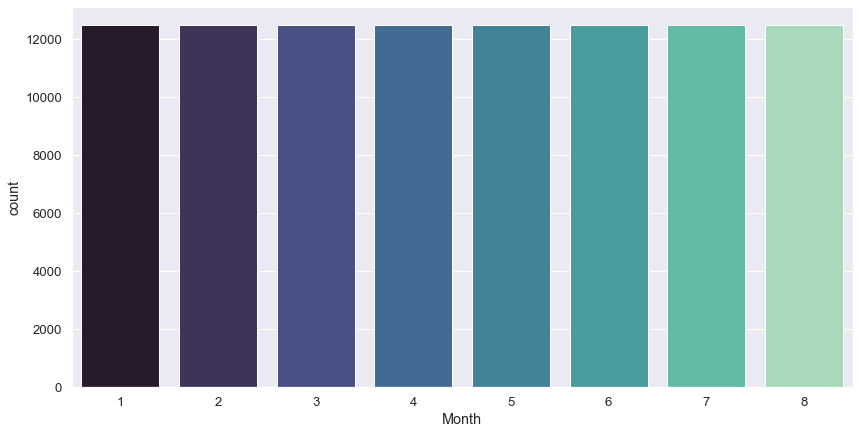

In [8]:
sns.countplot(credit_df['Month'], palette='mako');

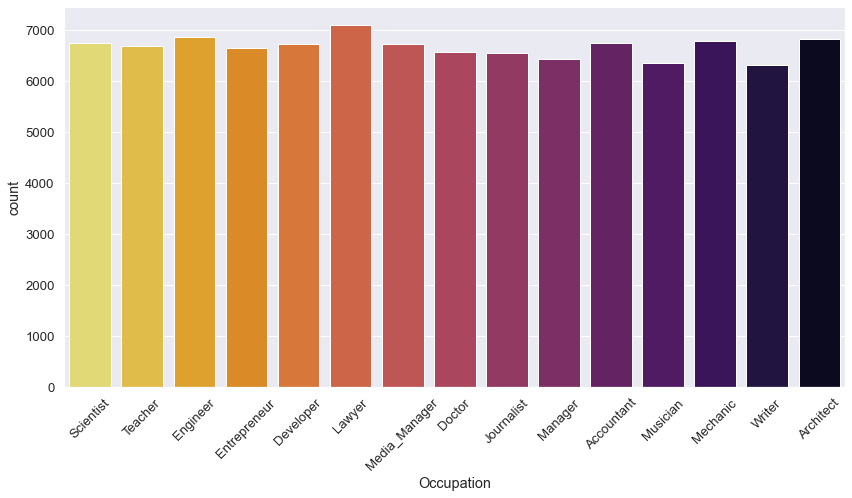

In [9]:
sns.countplot(credit_df['Occupation'], palette='inferno_r');
# Rotate the x-tick labels
plt.xticks(rotation=45);

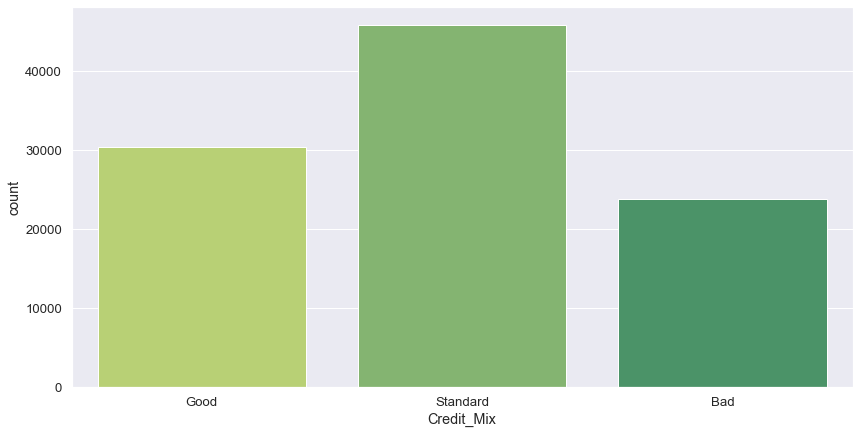

In [10]:
sns.countplot(credit_df['Credit_Mix'], palette='summer_r');

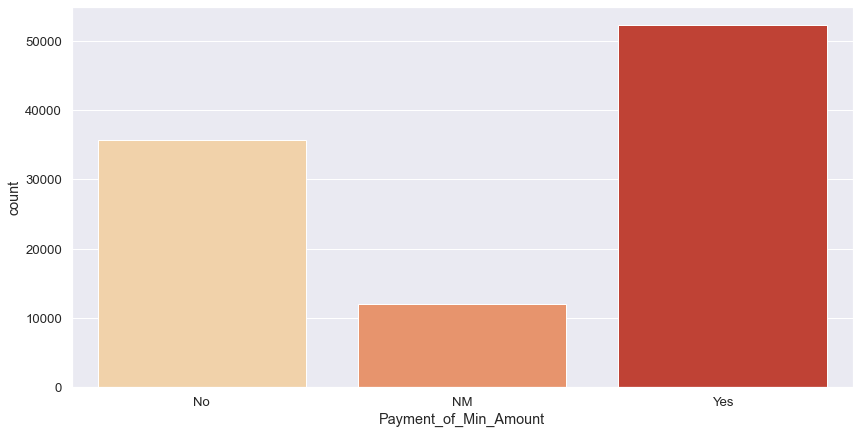

In [11]:
sns.countplot(credit_df['Payment_of_Min_Amount'], palette='OrRd');

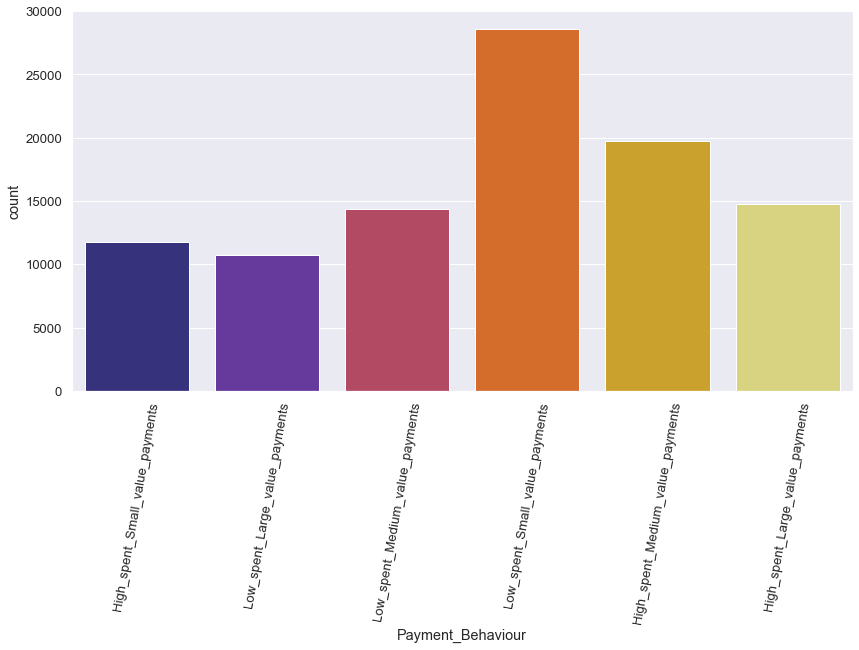

In [12]:
sns.countplot(credit_df['Payment_Behaviour'], palette='CMRmap');
plt.xticks(rotation=80);

## Plotting The Target

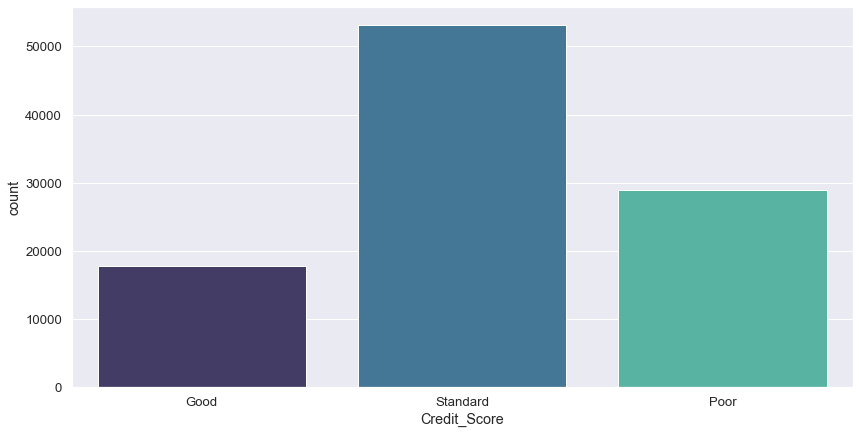

In [13]:
sns.countplot(credit_df['Credit_Score'], palette='mako');

In [14]:
credit_df['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

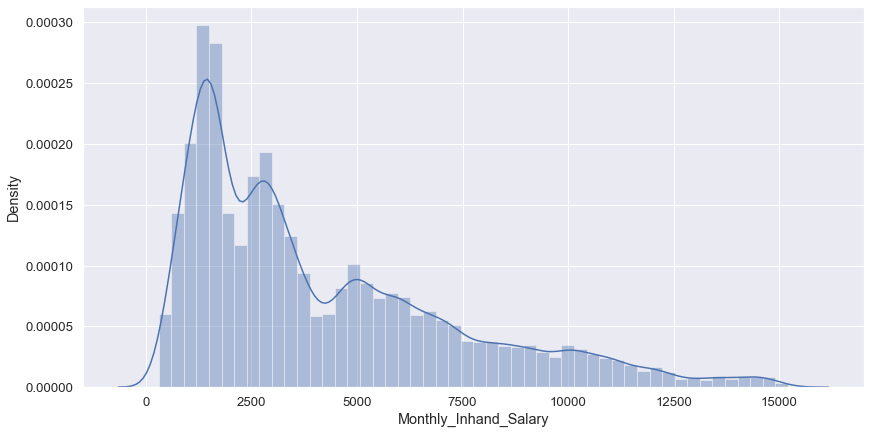

In [17]:
sns.distplot(credit_df['Monthly_Inhand_Salary']);

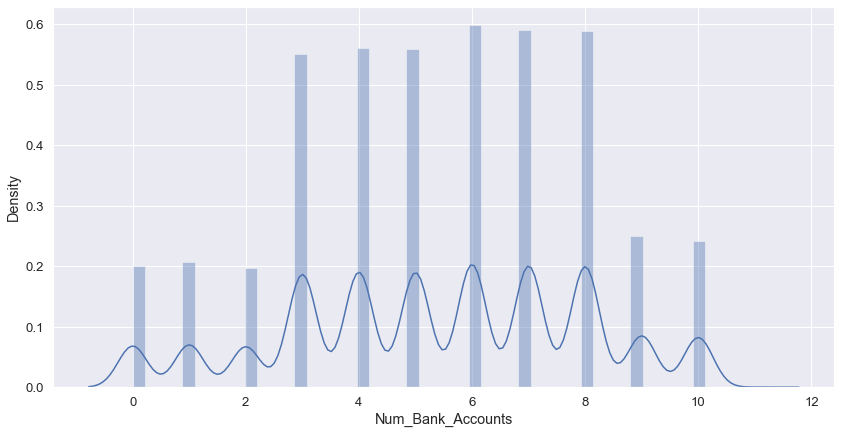

In [19]:
sns.distplot(credit_df['Num_Bank_Accounts']);

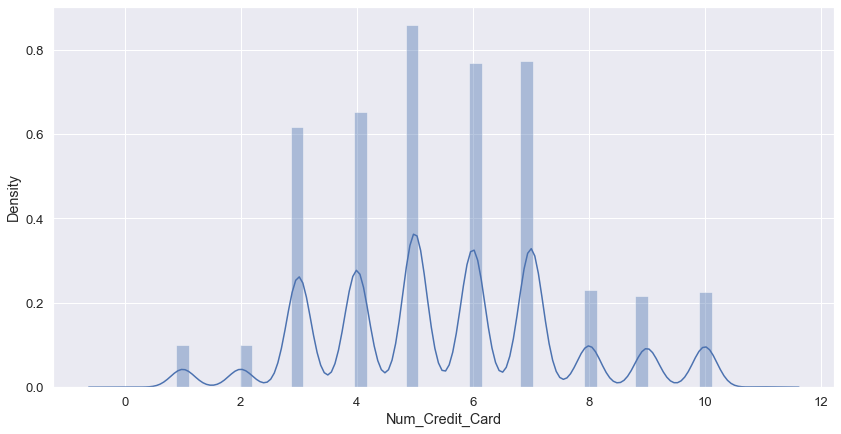

In [20]:
sns.distplot(credit_df['Num_Credit_Card']);

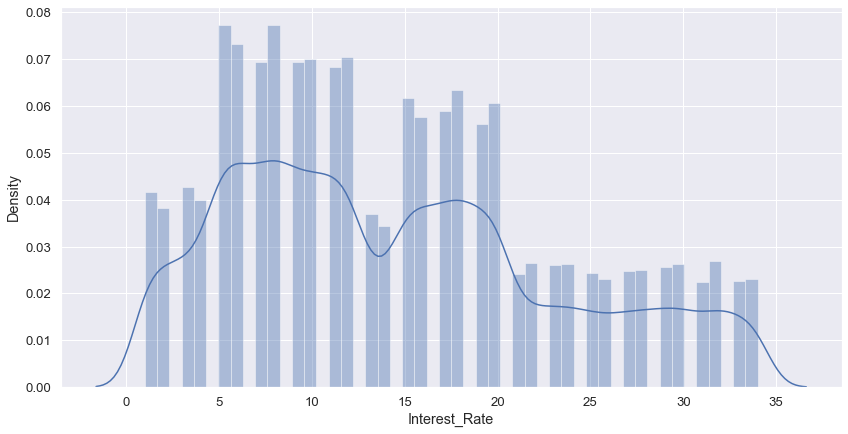

In [21]:
sns.distplot(credit_df['Interest_Rate']);

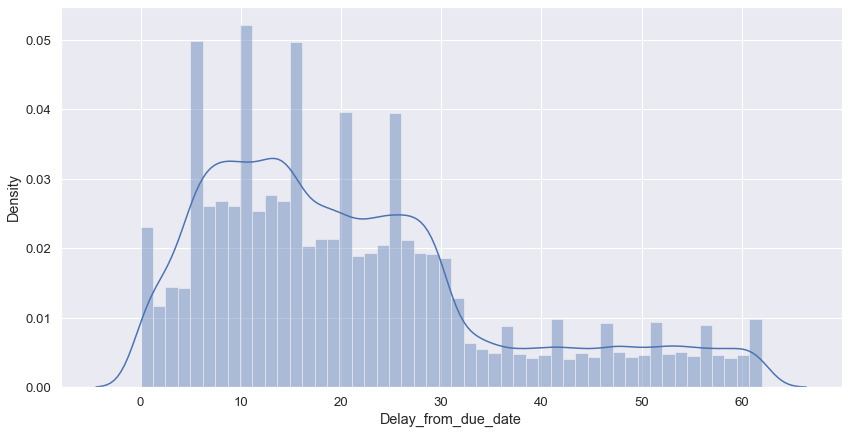

In [22]:
sns.distplot(credit_df['Delay_from_due_date']);

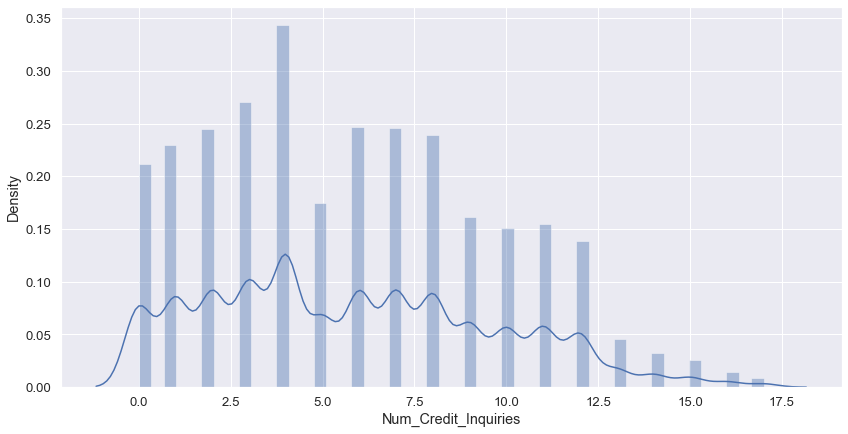

In [23]:
sns.distplot(credit_df['Num_Credit_Inquiries']);

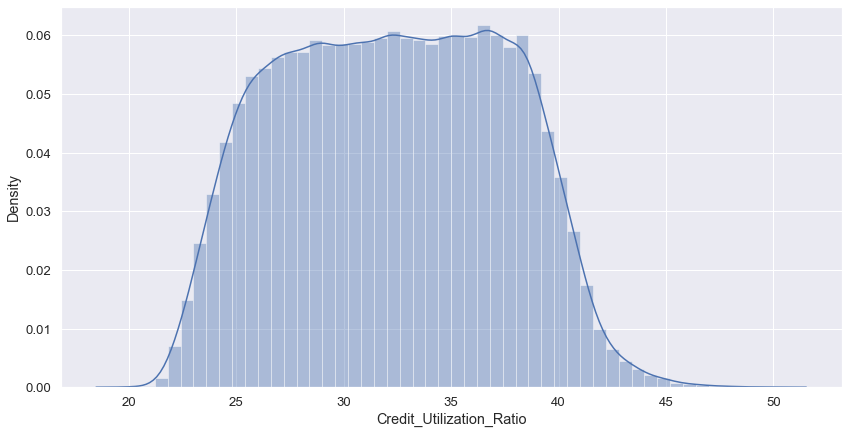

In [25]:
sns.distplot(credit_df['Credit_Utilization_Ratio']);

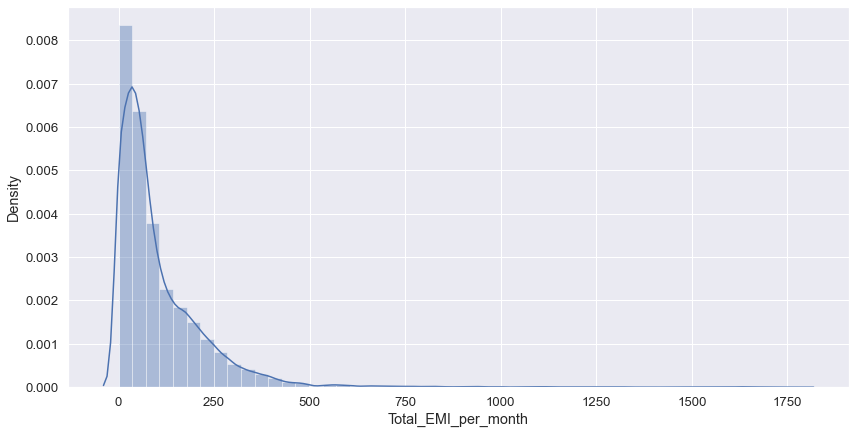

In [26]:
sns.distplot(credit_df['Total_EMI_per_month']);

In [28]:
credit_df['Type_of_Loan'].value_counts().head(20)

No Data                                     11408
Not Specified                                1408
Credit-Builder Loan                          1280
Personal Loan                                1272
Debt Consolidation Loan                      1264
Student Loan                                 1240
Payday Loan                                  1200
Mortgage Loan                                1176
Auto Loan                                    1152
Home Equity Loan                             1136
Personal Loan, and Student Loan               320
Not Specified, and Payday Loan                272
Mortgage Loan, and Home Equity Loan           264
Student Loan, and Payday Loan                 256
Student Loan, and Credit-Builder Loan         248
Credit-Builder Loan, and Not Specified        248
Payday Loan, and Debt Consolidation Loan      240
Payday Loan, and Auto Loan                    240
Mortgage Loan, and Not Specified              232
Payday Loan, and Personal Loan                232


## Data Cleaning

### Removing Irelevant columns

In [29]:
del credit_df['ID'] # Identification 
del credit_df['Name'] # Name of client 
del credit_df['SSN'] # SSN (social security number of a person)

### Type of loans 

In [30]:
## Rebuild Type of loans Columns
df = credit_df.copy()
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

The code above creates new columns based on the values in the Type_of_Loan column. For each value in the head(9).index[1:] of the value_counts of Type_of_Loan, a new column is created with the same name. The values in each new column are a boolean representation of whether the corresponding value in the Type_of_Loan column contains the string represented by the new column name.

Once the new columns have been created, the original Type_of_Loan column is deleted. This can be useful if you want to convert a categorical variable with multiple categories into separate binary columns, where each column represents a single category.

### Payment of min amount

In [32]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [33]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [41]:
# Edit Columns from bool to int 
for col in list(df.columns[-8:]):
    df[col] = df[col].astype(float)

In [35]:
IDs = 1 
for ID in df['Customer_ID'].unique() :
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

## Data Preprocessing
### Handling Catogerical

In [43]:
df.select_dtypes(include='object')

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,Good,No,High_spent_Small_value_payments,Good
1,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good
3,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,Scientist,Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99996,Mechanic,Good,No,High_spent_Medium_value_payments,Poor
99997,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99998,Mechanic,Good,No,Low_spent_Large_value_payments,Standard


In [46]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [49]:
m = {
    
    'Poor':0,
    'Standard':1,
    'Good':2,
}

df['Credit_Score'] = df['Credit_Score'].map(m)

In [51]:
del df['Customer_ID']

In [52]:
df = pd.get_dummies(df,drop_first=True)

The code is using the get_dummies function from the pandas library to convert categorical variables into dummy/indicator variables. The drop_first parameter is set to True, meaning that the first level of each categorical variable is dropped to avoid perfect multicollinearity.

This function is applied to the entire df DataFrame and the resulting data will overwrite the original DataFrame. The result is a DataFrame with one-hot encoded columns for each unique category in the original DataFrame's categorical columns. The resulting DataFrame will have more columns than the original, with each new column representing one category of the original categorical column. The values in these new columns are either 0 or 1 depending on whether or not a specific observation belongs to a particular category.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  float64
 8   Delay_from_due_date                                 100000 non-nu

### Data Splitting


In [54]:
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"] 

The code is splitting the DataFrame df into two separate arrays: X and y.

X is created by using the drop method on the df DataFrame to remove the "Credit_Score" column. The axis=1 argument is used to specify that the operation is performed along the columns (as opposed to the rows, which would be axis=0). Finally, the values property is used to convert the resulting DataFrame into a numpy array.

y is created by directly selecting the "Credit_Score" column from the df DataFrame and converting it into a one-dimensional numpy array.

X and y are commonly used as input features and target variables in machine learning models, respectively.


### Apply oversampling¶
* Data is Not 100% balanced, Let's try improving it.

In [55]:
y.value_counts(normalize=True)

1    0.53174
0    0.28998
2    0.17828
Name: Credit_Score, dtype: float64

In [56]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

This code is using the Synthetic Minority Over-sampling Technique (SMOTE) from the imblearn library to balance the classes in the target variable y.

The SMOTE class is imported from the imblearn.over_sampling module. An instance of the class is created with the sampling_strategy='auto' argument, which means that SMOTE will use the ratio of the majority class to the minority class as the resampling ratio.

The fit_resample method is then applied to the X and y arrays to generate the synthetic samples, and the resulting balanced arrays are stored in X_data_rus and y_data_rus.

Balancing the classes in a target variable is important in machine learning because many algorithms assume that the classes in the target variable are approximately balanced. If the classes are imbalanced, then the algorithm may have difficulty accurately predicting the minority class. This is because the algorithm is likely to over-represent the majority class and under-represent the minority class.

For example, if a classification problem has a target variable with 99% of the data belonging to class A and 1% belonging to class B, a classifier trained on this data would achieve high accuracy by simply predicting all samples as class A, even though this is not a good prediction. To avoid this, the data needs to be balanced so that the classifier can learn the distinction between the two classes.

Balancing the classes can be done by oversampling the minority class, undersampling the majority class, or using a combination of both. The method used depends on the specific problem and the data being used.

In [57]:
y_data_rus.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: Credit_Score, dtype: float64

In [58]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

The code above is splitting the balanced data into training and testing sets. The data is split into 70% training data and 30% testing data. The train_test_split function from scikit-learn is used to perform this split. The argument test_size=0.3 specifies the size of the test set as 30% of the data. The argument random_state=42 sets a random seed for reproducibility. The argument stratify=y_data_rus ensures that the class distribution in the target variable is preserved in both the training and test sets, as the classes in the target variable are now balanced.

### Handling Numerical
* Using Power transformer to avoid Data Skewness

In [59]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

The code above is creating an instance of the PowerTransformer class from scikit-learn's preprocessing module. The method specified is 'yeo-johnson', which is a power transformation method that can handle both positive and negative values. The argument standardize=True specifies that the transformed data should be standardized to have zero mean and unit variance. The fit method is then applied to the X_train data, which means the PowerTransformer is being fitted to the training data.

Power transformations like the 'yeo-johnson' method are often necessary in machine learning to achieve normality in the data distribution. Many machine learning algorithms assume that the data is normally distributed, which is not always the case. Power transformations can be used to normalize the data by transforming the data distribution to a normal or nearly normal distribution. This can help improve the performance of machine learning models and make the models more robust. By fitting the power transformation to the training data, the model is effectively learning the most appropriate way to normalize the data for the specific problem being solved.

In [60]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

## Modeling and Evaluation¶
### Model Building

In [61]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

The code defines an instance of the StackingClassifier from the scikit-learn library, which uses a stacking approach to combine several classifiers into one meta-classifier. The input to the StackingClassifier is a list of tuple pairs that each contain a string identifier and an instance of a base classifier (bagging, extraTrees, randomForest, histGradientBoosting, XGB). The n_jobs=-1 argument sets the number of CPU cores to use for parallel computation to all available cores.

The StackingClassifier is a meta-model that combines the predictions from several base models (bagging, extraTrees, randomForest, histGradientBoosting, and XGB in this case) to form a final prediction. It helps to improve the performance of the model by aggregating the strengths of each base model, which can lead to a more accurate and robust final prediction. By combining the predictions of multiple models, the StackingClassifier can help mitigate the overfitting or underfitting that may occur in individual models.

### Model Fitting

In [62]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytr...
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                 

When you call model.fit(X_train, y_train), the StackingClassifier object model will train all of the base models (bagging, extraTrees, randomForest, histGradientBoosting, and XGB) using the training data X_train and the target variable y_train. It trains these models by calling the fit method on each of these base models.

Then, the StackingClassifier will use the predictions of these base models as new features in the meta-model. The meta-model will then be trained on the predictions of the base models and the target variable to make the final predictions. The purpose of using the StackingClassifier is to improve the performance of the model by combining the strengths of multiple models.

### Model evaluation

In [63]:
print("Train Score: ",model.score(X_train, y_train))

Train Score:  0.9995522321228675


A score of 0.9995522321228675 implies that the accuracy of the trained model on the training data is 99.96%. This high score could mean that the model is overfitting to the training data, i.e. it has learned the noise and idiosyncrasies of the training data too well, and may not perform as well on new unseen data.

In [64]:
print("Test Score: ",model.score(X_test, y_test))

Test Score:  0.8807488977579038


The test score of 0.8807488977579038 is a measure of the accuracy of the Stacking Classifier model in predicting the target variable in the test data. This score is in the range of 0 to 1. A score closer to 1 implies that the model is making more accurate predictions on the test data, whereas a score closer to 0 means the model is making less accurate predictions.

A test score of 0.8807488977579038 is a measure of how well the trained model performs on unseen data. In this case, a test score of 0.8807 implies that the model accurately predicts the target variable for about 88% of the instances in the test set. It could indicate that the model has high accuracy and is a good fit for the data. However, it depends on the context of the problem and the criteria for evaluating the model's performance.

In [66]:
y_pred = model.predict(X_test)

In [67]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     16073
           1       0.82      0.84      0.83     15682
           2       0.93      0.92      0.92     16102

    accuracy                           0.88     47857
   macro avg       0.88      0.88      0.88     47857
weighted avg       0.88      0.88      0.88     47857



The precision, recall and F1-score of each class (0, 1, 2) are shown, as well as the overall accuracy, macro average, and weighted average of the model's predictions on the test data.

* Precision measures the proportion of positive instances that are correctly classified as such, i.e. True Positives / (True Positives + False Positives).
* Recall measures the proportion of positive instances that are correctly classified out of all positive instances, i.e. True Positives / (True Positives + False Negatives).
* F1-score is the harmonic mean of precision and recall, and provides a single score that balances both metrics.
* Accuracy is the proportion of correctly classified instances out of all instances.
* Macro average is the average of the metrics computed at the class level.
* Weighted average is the average of the metrics computed at the class level with class imbalance taken into consideration.

In this case, the model has an overall accuracy of 88%, a macro average of 88%, and a weighted average of 88%. The precision, recall and F1-score of the three classes are in the range of 82% to 93%.

###### Such results imply that the model has a relatively good precision and recall performance, with an overall accuracy of 0.88. Precision measures the proportion of positive predictions that were correct, recall measures the proportion of actual positive instances that were correctly predicted. F1-score is the harmonic mean of precision and recall, which gives a better sense of the overall performance of the model. 
###### A higher value of precision, recall and f1-score would imply that the model is making accurate predictions. However, a lower score might indicate overfitting or underfitting, or a need for improvement in the model.

### Model Saving

In [1]:
#joblib.dump(model,'model.h5')
#joblib.dump(scalar,'scalar.h5')